### A tour of machine learning classifiers using scikit-learn 

In [1]:
from sklearn import datasets
import numpy as np

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, [2, 3]]
y = iris.target

In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
print('Label counts in y: ', np.bincount(y))
print('Label count in y_train: ', np.bincount(y_train))
print('Label count in y_test: ', np.bincount(y_test))

Label counts in y:  [50 50 50]
Label count in y_train:  [34 32 39]
Label count in y_test:  [16 18 11]


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter = 40, eta0 = 0.01, random_state = 0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples %d'% (y_test != y_pred).sum())

Misclassified samples 4


In [13]:
from sklearn.metrics import accuracy_score
print('Accuracy %.2f'% accuracy_score(y_test, y_pred))

Accuracy 0.91


In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [22]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                   alpha = 0.8, c = cmap(idx),
                   marker = markers[idx], label = cl,
                   edgecolors = 'black')
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '',
                   alpha = 1.0, linewidths = 1, marker = 'o',
                   s = 55, label = 'test set', edgecolors = 'black')

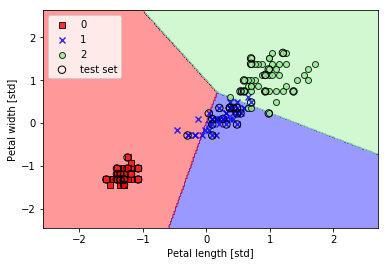

In [23]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std,
                     y = y_combined,
                     classifier = ppn,
                     test_idx = range(105, 150))
plt.xlabel('Petal length [std]')
plt.ylabel('Petal width [std]')
plt.legend(loc = 'upper left')
plt.show()